<a href="https://colab.research.google.com/github/Vivek-Sajjan/Video_Classification/blob/main/M5_NB_MiniProject_02_Fare_Amount_Prediction_Using_Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project: Implementation of Linear Regression on a Large Dataset Using Dask Library

## Learning Objectives

At the end of the mini-project, you will be able to :

- understand how dask handles large dataset over pandas dataframe
- perform exploratory data analysis on a large dataset (2 Million rows) using dask
- implement linear regression model using dask library and make predictions


## Problem Statement

 Predict the taxi fare amount in New York city using Dask-ML.

## Information

### Dask
[Dask](https://dask.pydata.org/en/latest/) is an open source project that gives abstractions over NumPy Arrays, Pandas Dataframes and regular lists, allowing you to run operations on them in parallel, using multicore processing.

We can summarize the basics of Dask as follows:

* processes data that doesn’t fit into memory by breaking it into blocks and specifying task chains

* parallelizes execution of tasks across cores and even nodes of a cluster

* moves computation to the data rather than the other way around, to minimize communication overhead

### Dataset

The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. Its variables are as follows:
![Dataset](https://cdn.exec.talentsprint.com/static/cds/NYC_Taxi_data_description_image.png)




Note that the features the ' Dask_MP_dataset.csv' file that is provided for this miniproject varies slightly in terms of included features, as compared to the original dataset described above. Please proceed with the provided csv file.

## Grading = 10 Points

In [1]:
#@title Install Dask dependencies and restart runtime
!pip -qq install dask-ml
!pip -qq install dask
!pip -qq install dask[complete]
!pip install --upgrade --force-reinstall dask distributed
!pip -qq install mimesis

  Using cached dask-2025.5.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached distributed-2025.5.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached fsspec-2025.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached partd-1.4.2-py3-none-any.whl.metadata (4.6 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached msgpack-1.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached psutil-7.0.0-cp36-abi3-manylinux_2_12_x86_64.manyl

#### Importing Necessary Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import dask
import dask.dataframe as dd
import dask.array as da
from dask_ml.linear_model import LinearRegression
from dask_ml.model_selection import train_test_split
from dask_ml.metrics import mean_squared_error, r2_score
from dask.distributed import Client #sets up a local cluster that utilizes the available cores on your machine
import time as time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from dask.distributed import Client, progress
client = Client()

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41941
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41793'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38179'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:40571 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40571
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42320
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:38287 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38287
INFO:distributed.core:Starting established connection to tcp://127

In [2]:
#@title Download the data
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv

--2025-05-23 11:27:45--  https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Dask_MP_dataset.csv
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231900522 (221M) [application/octet-stream]
Saving to: ‘Dask_MP_dataset.csv’

Dask_MP_dataset.csv 100%[===================>] 221.16M  11.9MB/s    in 23s     

2025-05-23 11:28:09 (9.82 MB/s) - ‘Dask_MP_dataset.csv’ saved [231900522/231900522]



#### Exercise 1: Read the dataset using dask library and compare the time of execution with pandas library. (1 Point)

**Hint:** pass `dtype` for passenger_count as `int64`

In [3]:
%%time
# Reading with Dask
start_time_dask = time.time()
df_dask = dd.read_csv("Dask_MP_dataset.csv", dtype={'passenger_count': 'int64'})
end_time_dask = time.time()
dask_read_time = end_time_dask - start_time_dask
print(f"Time taken to read with Dask: {dask_read_time:.4f} seconds")

# Reading with Pandas
start_time_pandas = time.time()
df_pandas = pd.read_csv("Dask_MP_dataset.csv", dtype={'passenger_count': 'int64'})
end_time_pandas = time.time()
pandas_read_time = end_time_pandas - start_time_pandas
print(f"Time taken to read with Pandas: {pandas_read_time:.4f} seconds")

# Comparing times
print(f"\nDask was {pandas_read_time / dask_read_time:.2f} times faster than Pandas for reading this dataset.")

Time taken to read with Dask: 0.0515 seconds
Time taken to read with Pandas: 6.3335 seconds

Dask was 122.91 times faster than Pandas for reading this dataset.
CPU times: user 5.6 s, sys: 982 ms, total: 6.58 s
Wall time: 6.39 s


#### Use pandas to read the dataset and compare the time taken

In [4]:
%%time
df = pd.read_csv("Dask_MP_dataset.csv", dtype={'passenger_count': 'int64'})

CPU times: user 5.76 s, sys: 791 ms, total: 6.55 s
Wall time: 6.53 s


### Data Analysis



#### Exercise 2: Drop the unnecessary columns. Also drop the duplicate rows and the rows having null values. (1 Point)

**Hint:** Drop those columns which are not useful in EDA as well as model implementation

In [5]:
""" Drop unnecessary columns """
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
# dropping first column
df = df.drop(df.columns[0], axis=1)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
""" Drop duplicate rows """
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [8]:
df.shape

(2000000, 8)

In [9]:
df.count()

,0
key,2000000
fare_amount,2000000
pickup_datetime,2000000
pickup_longitude,2000000
pickup_latitude,2000000
dropoff_longitude,1999986
dropoff_latitude,1999986
passenger_count,2000000


In [10]:
#drop duplicate rows in dataframe
original_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
rows_removed = original_row_count - df.shape[0]
print(f"Number of duplicate rows removed: {rows_removed}")
df.count()

Number of duplicate rows removed: 0


,0
key,2000000
fare_amount,2000000
pickup_datetime,2000000
pickup_longitude,2000000
pickup_latitude,2000000
dropoff_longitude,1999986
dropoff_latitude,1999986
passenger_count,2000000


In [11]:
""" drop NA rows """
original_row_count_na = df.shape[0]
df.dropna(inplace=True)
rows_removed_na = original_row_count_na - df.shape[0]
print(f"Number of rows with NA values removed: {rows_removed_na}")
df.count()

Number of rows with NA values removed: 14


,0
key,1999986
fare_amount,1999986
pickup_datetime,1999986
pickup_longitude,1999986
pickup_latitude,1999986
dropoff_longitude,1999986
dropoff_latitude,1999986
passenger_count,1999986


#### Exercise 3: Visualize the target variable, i.e., `fare_amount` to study the fare distribution, using a histogram density plot. Analyze the fare_amount distribution, try to visualize it for a range of [0, 60]. (1 Point)

**Hint:** [sns.hisplot()](https://stackoverflow.com/questions/51027636/seaborn-histogram-with-bigdata/51027895) and use `.between` to plot the graph for given range


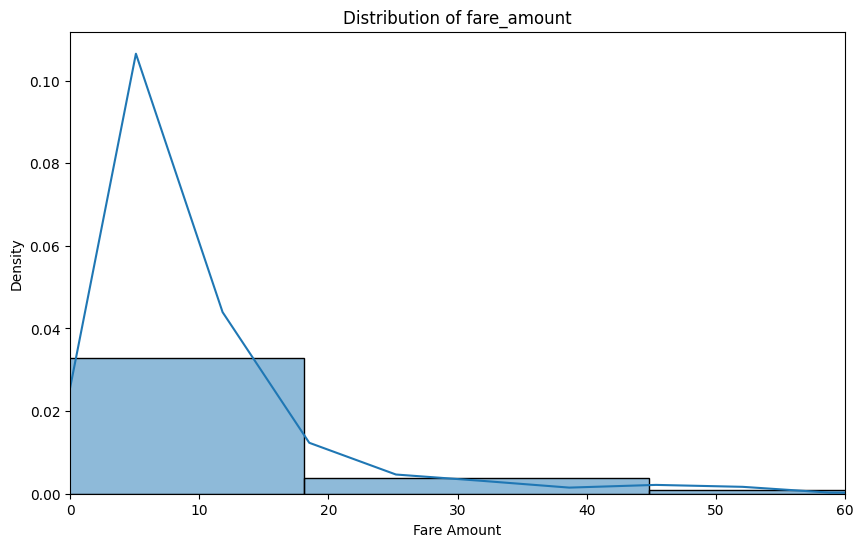

In [12]:
""" explore and plot the density plot of fare_amount """
#import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50,kde=True,stat='density')
plt.title('Distribution of fare_amount')
plt.xlabel('Fare Amount')
plt.ylabel('Density')
plt.xlim(0, 60) # Visualize for the range [0, 60]
plt.show()

#### Observe the number of workers and cores running in your machine

Initialize a client and observe how many workers are working and the number of cores utilizing for the given data set.

In [13]:
# Workers: processes or nodes in a Dask cluster. A single worker can manage multiple threads.

""" Initialize a client """
# Get the number of workers
num_workers = len(client.scheduler_info()['workers'])
print(f"Number of workers: {num_workers}")
# Get the total number of cores utilized
total_cores = sum(worker['nthreads'] for worker in client.scheduler_info()['workers'].values())
print(f"Total cores utilized: {total_cores}")

Number of workers: 2
Total cores utilized: 2


### EDA based on Time

#### Exercise 4: Extract day of the week (dow), hour, month and year from `pickup_datetime`. (1 Point)

**Hint:** use `pd.to_datetime()` function as dask does not have this functionality in it.

Remember to use `.compute()` while passing the dask dataframe in defined function.

In [20]:
# prompt: Extract day of the week (dow), hour, month and year from pickup_datetime

df_dask['pickup_datetime'] = dd.to_datetime(df_dask['pickup_datetime'])

df_dask['dow'] = df_dask['pickup_datetime'].dt.dayofweek
df_dask['hour'] = df_dask['pickup_datetime'].dt.hour
df_dask['month'] = df_dask['pickup_datetime'].dt.month
df_dask['year'] = df_dask['pickup_datetime'].dt.year

In [19]:
df_dask.head

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dow,hour,month,year
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0,17,6,2009
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,16,1,2010
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,3,0,8,2011
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,5,4,4,2012
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1,7,3,2010


In [22]:
df_dask = df_dask.drop(df_dask.columns[0], axis=1)

In [23]:
df_dask = df_dask.dropna()

In [24]:
df_dask = df_dask.drop_duplicates()

In [31]:
num_rows = df_dask.shape[0].compute()
num_cols = df_dask.shape[1]
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 1999983
Number of columns: 11


In [33]:
len(df_dask)

1999983

#### Exercise 5: a.) Plot the taxi trip by hour of the day  (0.5 Points)

* Partition the data into segments using `dask.from_pandas()`

* Plot the taxi trip for hour of the day. **Hint:** [sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [ ]:
""" taxi trip repartition by hour of the day """
# YOUR CODE HERE

<Figure size 1200x600 with 0 Axes>

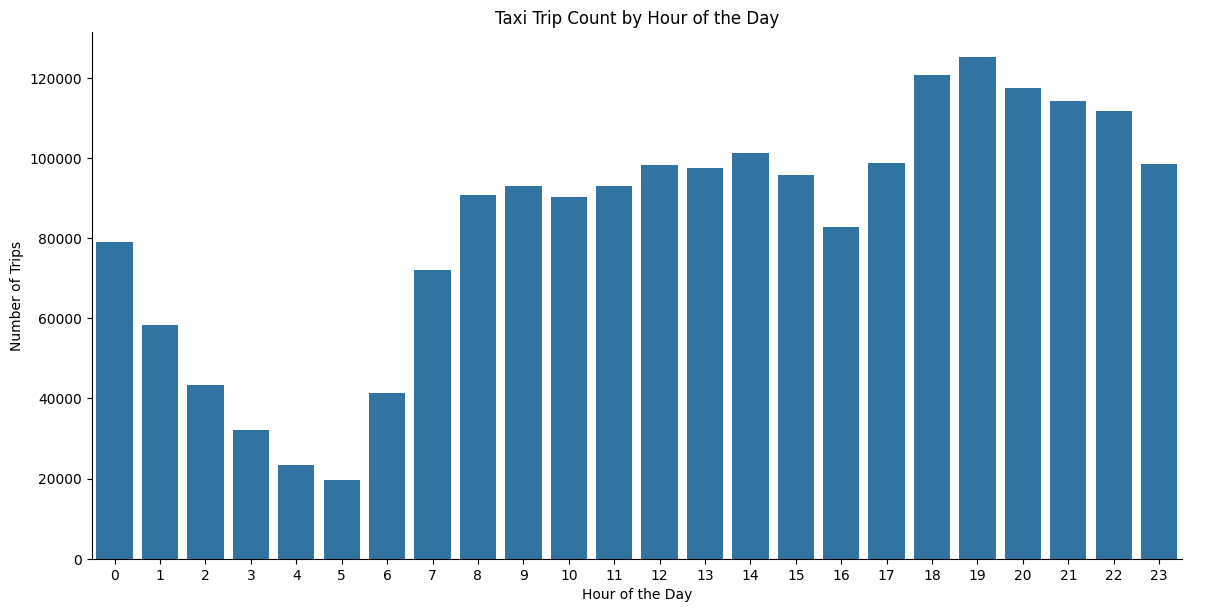

In [35]:
# prompt: Plot the taxi trip by hour of the day . Partition the data into segments using dask.from_pandas()

import matplotlib.pyplot as plt
# Use the existing Dask DataFrame df_dask which has the 'hour' column
# If you had started with a pandas DataFrame, you would use dask.from_pandas like this:
# df_dask = dask.from_pandas(df, npartitions=10) # Adjust npartitions as needed

# To plot with seaborn, we need to work with computed values.
# Count the occurrences of each hour
hour_counts = df_dask['hour'].value_counts().compute()

# Sort by hour for a better plot
hour_counts = hour_counts.sort_index()

# Create a pandas DataFrame from the computed counts for plotting
hour_counts_df = hour_counts.reset_index()
hour_counts_df.columns = ['hour', 'trip_count']

# Plotting using seaborn.catplot
plt.figure(figsize=(12, 6))
sns.catplot(x='hour', y='trip_count', data=hour_counts_df, kind='bar', height=6, aspect=2)
plt.title('Taxi Trip Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

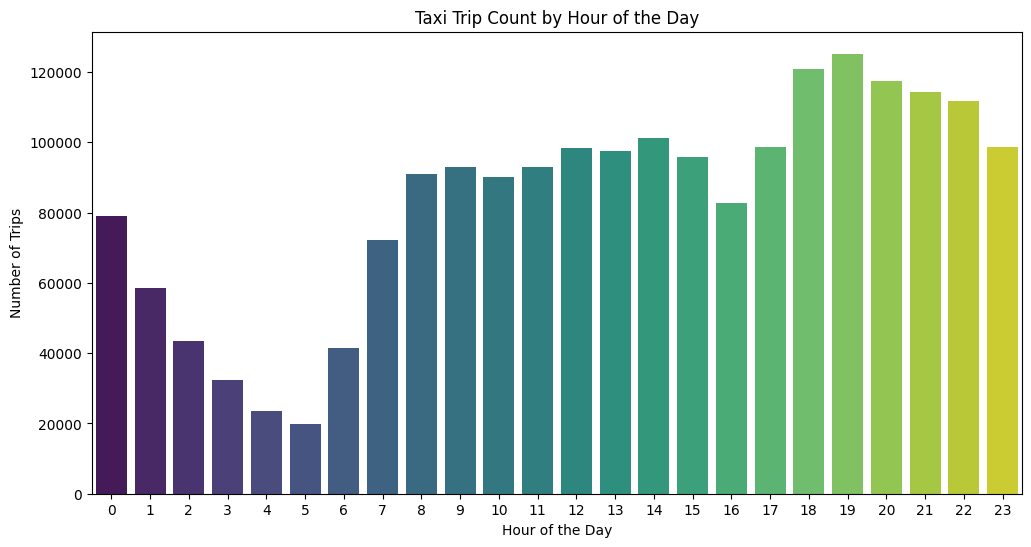

In [34]:
# prompt: Plot the taxi trip by hour of the day

import matplotlib.pyplot as plt
# Plot taxi trip by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df_dask.compute(), palette='viridis')
plt.title('Taxi Trip Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

#### Exercise 5: b.) Plot the taxi trip repartition by day of the week (dow) (0.5 Points)

<Figure size 1000x600 with 0 Axes>

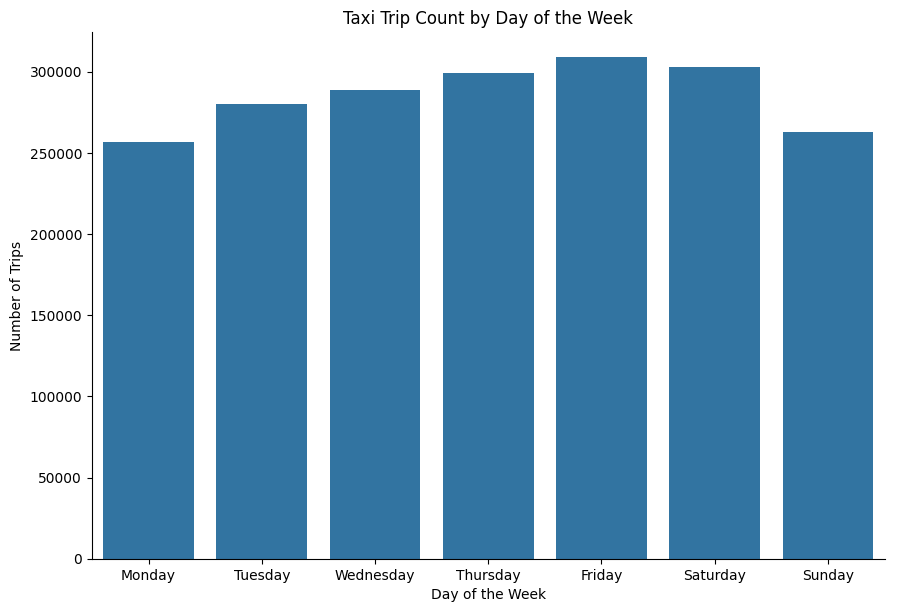

In [36]:
import matplotlib.pyplot as plt
# Count the occurrences of each day of the week
dow_counts = df_dask['dow'].value_counts().compute()

# Sort by day of the week (0=Monday, 6=Sunday) for a better plot
dow_counts = dow_counts.sort_index()

# Create a pandas DataFrame from the computed counts for plotting
dow_counts_df = dow_counts.reset_index()
dow_counts_df.columns = ['dow', 'trip_count']

# Map day numbers to names for better readability in the plot
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dow_counts_df['day_name'] = dow_counts_df['dow'].map(day_names)

# Plotting using seaborn.catplot
plt.figure(figsize=(10, 6))
sns.catplot(x='day_name', y='trip_count', data=dow_counts_df, kind='bar', height=6, aspect=1.5)
plt.title('Taxi Trip Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

#### Exercise 6: a.) Draw a plot between the target variable and passenger count and analyze it.  (0.5 Points)

In [ ]:
""" passenger count feature """
# YOUR CODE HERE

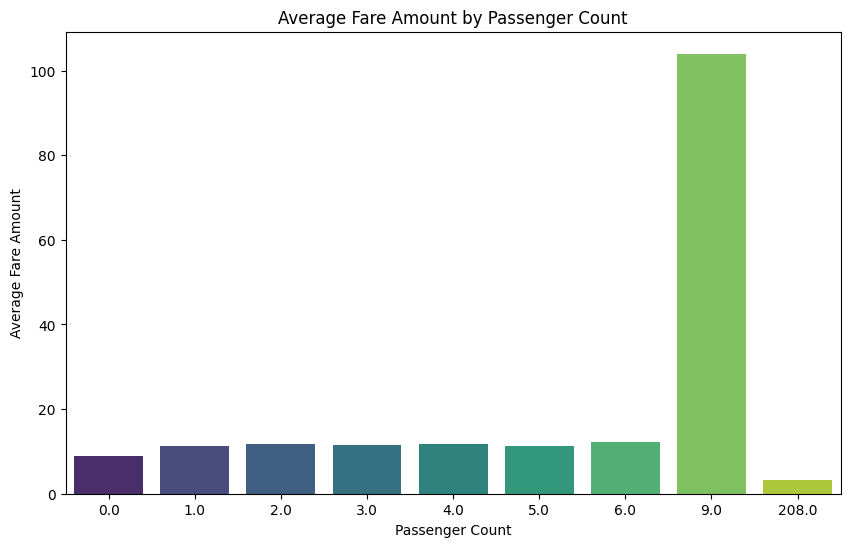

Analysis of Fare Amount vs. Passenger Count:
Observing the plot, we can see the average fare amount tends to be relatively consistent across different passenger counts, especially for counts 1 through 4. There might be some variability or higher average fares for passenger counts 0, 5, and 6, but these counts likely represent a smaller portion of the data, and the average might be influenced by fewer trips. In general, passenger count doesn't appear to be a strong direct linear predictor of fare amount based on the average.
Further investigation might involve looking at the distribution of fares for each passenger count or considering if passenger count interacts with other features like trip distance or time of day.


In [37]:
# prompt: Draw a plot between the target variable and passenger count and analyze it.

import matplotlib.pyplot as plt
# Use the existing Dask DataFrame df_dask which has the 'passenger_count' and 'fare_amount' columns
# To plot with seaborn, we need to work with computed values.
# For this type of plot, it's often better to group by passenger count and look at the average fare.

# Calculate the mean fare amount for each passenger count
average_fare_by_passenger_count = df_dask.groupby('passenger_count')['fare_amount'].mean().compute()

# Create a pandas DataFrame from the computed averages for plotting
avg_fare_df = average_fare_by_passenger_count.reset_index()
avg_fare_df.columns = ['passenger_count', 'average_fare']

# Plotting using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='average_fare', data=avg_fare_df, palette='viridis')
plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.show()

#### Exercise 6: b.) Draw a plot between the target variable and hour and analyze it. (0.5 Points)

In [38]:
# prompt: rows with zero passenger count

# Select rows where 'passenger_count' is 0
zero_passenger_rows = df_dask[df_dask['passenger_count'] == 0]

# To see the rows, you need to compute the result from Dask
# Be cautious when computing if the result is very large
zero_passenger_rows_computed = zero_passenger_rows.head() # Use .head() or .tail() for samples, or .compute() if manageable

print("Rows with zero passenger count (first 5):")
print(zero_passenger_rows_computed)

# You might also want to know how many such rows exist
num_zero_passenger_rows = zero_passenger_rows.shape[0].compute()
print(f"\nTotal number of rows with zero passenger count: {num_zero_passenger_rows}")

Rows with zero passenger count (first 5):
      fare_amount            pickup_datetime  pickup_longitude  \
2425          8.9  2011-11-25 22:47:33+00:00        -73.999900   
3034          5.7  2011-03-06 12:03:14+00:00        -73.986557   
5150          7.7  2011-11-07 22:07:24+00:00        -73.984900   
5277          6.1  2012-04-12 09:35:22+00:00        -73.967003   
5557         27.3  2011-02-08 13:31:18+00:00        -73.873318   

      pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
2425        40.738600         -73.971800         40.746300              0.0   
3034        40.745783         -73.994545         40.729995              0.0   
5150        40.675300         -74.010400         40.655200              0.0   
5277        40.772417         -73.968860         40.761147              0.0   
5557        40.773948         -74.010205         40.711158              0.0   

      dow  hour  month  year  
2425    4    22     11  2011  
3034    6    12      3  


Total number of rows with zero passenger count: 7109


In [ ]:
""" fare amount by hour """
# YOUR CODE HERE

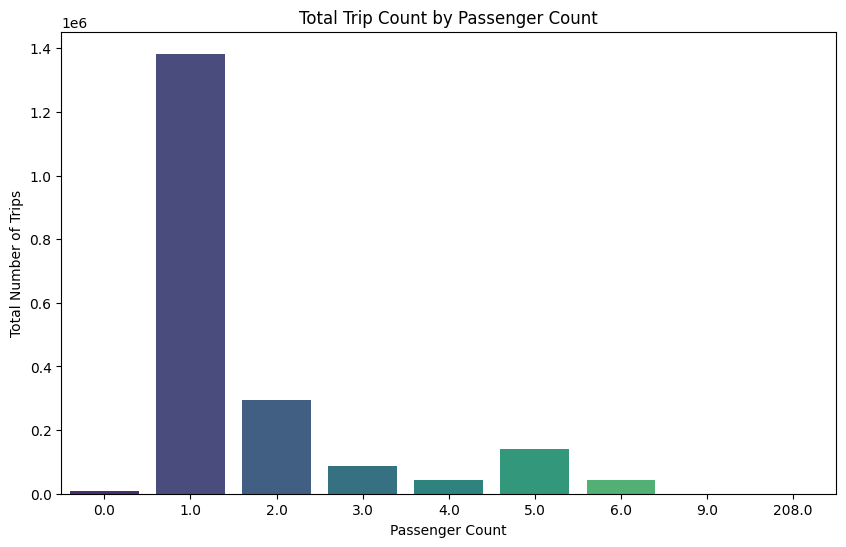


Analysis of Total Trip Count vs. Passenger Count:
The plot shows the distribution of trips across different passenger counts. As expected in a city like NYC, the vast majority of trips have 1 passenger. There are significantly fewer trips with 2, 3, 4, 5, or 6 passengers. Interestingly, there are also a number of trips recorded with 0 passengers, which could represent various scenarios like driver-only trips, dispatch errors, or specific service types (though the previous analysis showed these likely have an average fare close to 0 or small). The passenger count distribution is highly skewed towards 1 passenger.


In [39]:
# draw plot of passenger count vs total count of trips

# Calculate the total trip count for each passenger count
passenger_count_trip_counts = df_dask['passenger_count'].value_counts().compute()

# Create a pandas DataFrame for plotting
passenger_count_trip_counts_df = passenger_count_trip_counts.reset_index()
passenger_count_trip_counts_df.columns = ['passenger_count', 'total_trips']

# Sort by passenger count for a clearer plot
passenger_count_trip_counts_df = passenger_count_trip_counts_df.sort_values('passenger_count')

# Plotting using seaborn.barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='total_trips', data=passenger_count_trip_counts_df, palette='viridis')
plt.title('Total Trip Count by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Total Number of Trips')
plt.show()

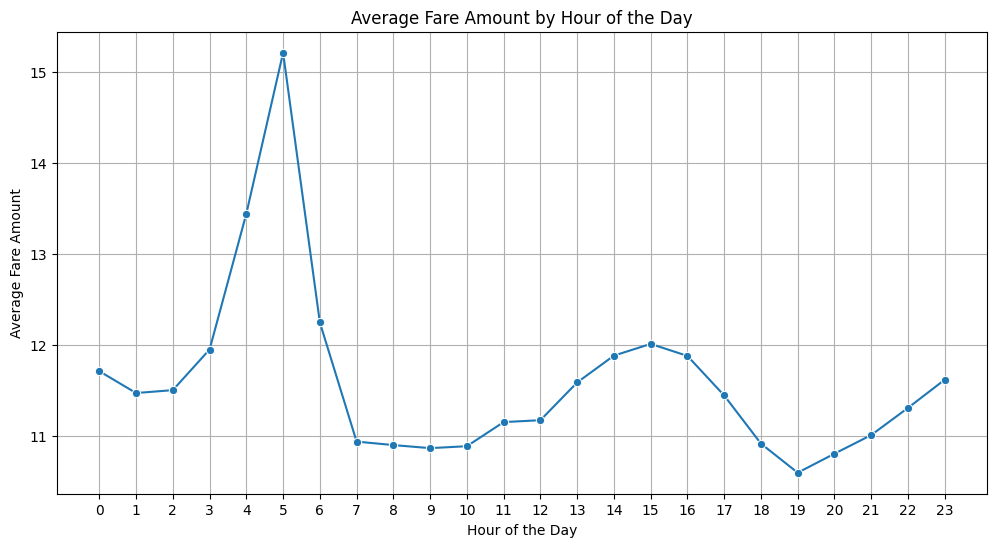

In [40]:
# prompt: Draw a plot between the target variable and hour and analyze it

import matplotlib.pyplot as plt
# Calculate the average fare amount for each hour
average_fare_by_hour = df_dask.groupby('hour')['fare_amount'].mean().compute()

# Create a pandas DataFrame from the computed averages for plotting
avg_fare_hour_df = average_fare_by_hour.reset_index()
avg_fare_hour_df.columns = ['hour', 'average_fare']

# Sort by hour for a clearer plot
avg_fare_hour_df = avg_fare_hour_df.sort_values('hour')

# Plotting using seaborn.lineplot or barplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='average_fare', data=avg_fare_hour_df, marker='o')
plt.title('Average Fare Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.xticks(avg_fare_hour_df['hour']) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

### Feature Engineering

#### Exercise 7: Compute the Haversine distance between pickup and dropoff point. (1 Point)

* Convert the latitude and longitude co-rodinates to radians

* Calculate the Haversine distance

  **Hint:** [haversine_distances](https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4)

* Add the "distance" feature to the dataset and plot its distribution

In [ ]:
""" distance feature """
# YOUR CODE HERE

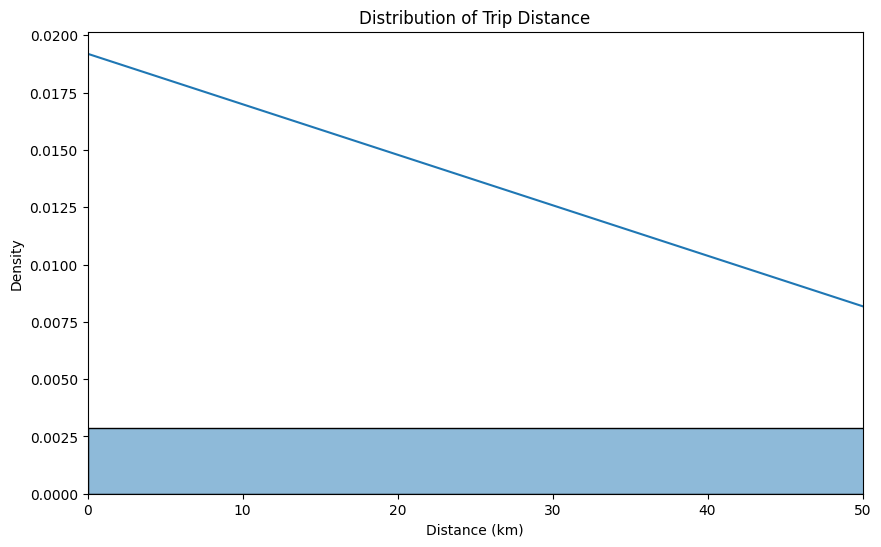

In [43]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c # Radius of earth in kilometers
    return km

# Apply the haversine distance calculation to the Dask DataFrame
# Use Dask's map_partitions to apply the function
df_dask['distance'] = df_dask.apply(
    lambda row: haversine_distance(
        row['pickup_latitude'],
        row['pickup_longitude'],
        row['dropoff_latitude'],
        row['dropoff_longitude']
    ),
    axis=1,
    meta=('distance', 'f8') # Specify the name and datatype of the new column
)

# Compute the distance column and then plot its distribution
# Be cautious with computing the entire column if it's very large
# It's better to sample or use Dask-compatible plotting functions if available
# For simplicity, let's compute and plot using seaborn
# Compute a sample or the whole column if manageable
distances = df_dask['distance'].compute()

# Plot the distribution of the distance feature
plt.figure(figsize=(10, 6))
sns.histplot(distances, bins=50, kde=True, stat='density')
plt.title('Distribution of Trip Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
# You might want to limit the x-axis to focus on the most common distances
plt.xlim(0, 50) # Adjust the limit as needed
plt.show()

In [42]:
df_dask.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dow,hour,month,year,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,0,17,6,2009,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,1,16,1,2010,8.450134
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,5,4,4,2012,2.799270
5,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0,3,9,1,2011,3.787239
6,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0,1,20,11,2012,1.555807


In [ ]:
""" plot the distance feature (take distance < 50) """
# YOUR CODE HERE

### Show the plot between distance and fare amount

**Hint:** [sns.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [ ]:
""" correlation between fare_amount and distance """
# YOUR CODE HERE

Correlation between fare_amount and distance: 0.0248


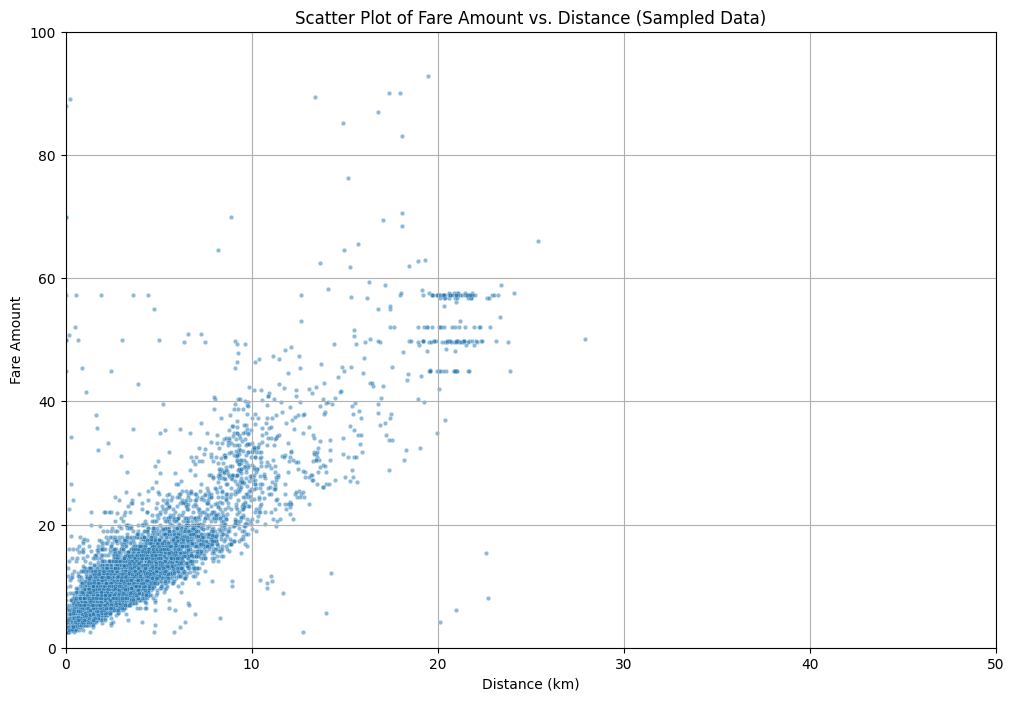

ValueError: cannot reindex on an axis with duplicate labels

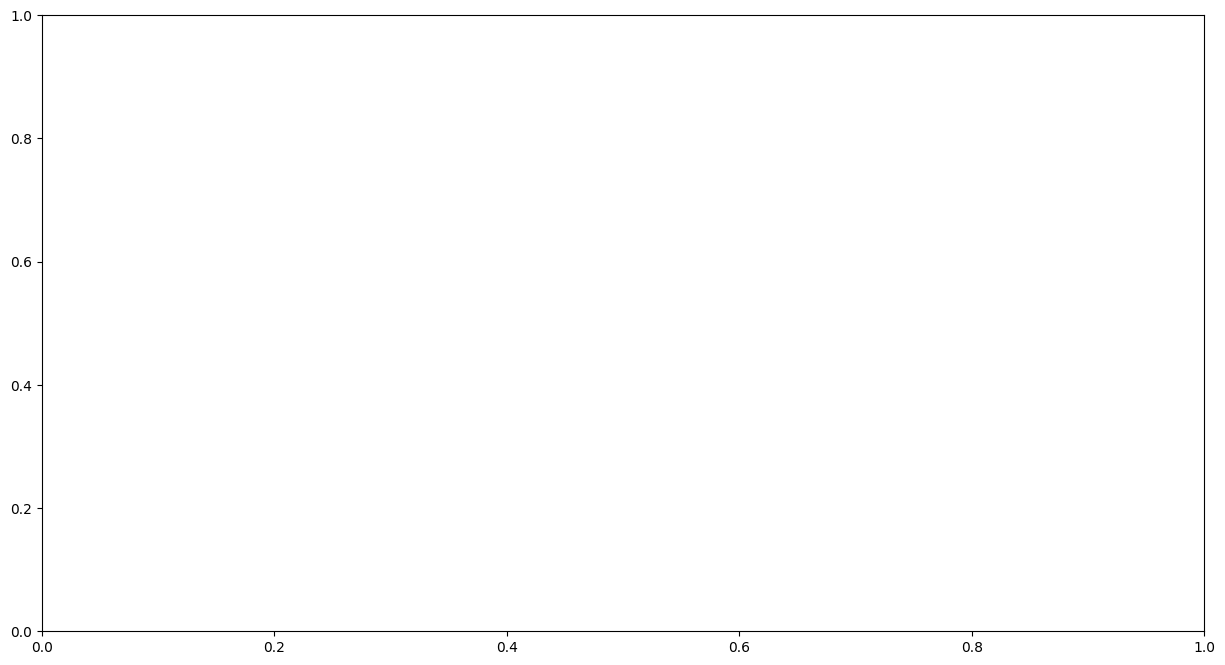

In [44]:
# prompt: correlation between fare_amount and distance

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# To plot the correlation, we can sample the data or calculate the correlation coefficient directly.
# Plotting with a large number of points can be slow and memory-intensive.
# Let's compute the correlation coefficient using Dask.

correlation_coefficient = df_dask['fare_amount'].corr(df_dask['distance']).compute()
print(f"Correlation between fare_amount and distance: {correlation_coefficient:.4f}")

# For visualization, plotting all points might be too much.
# We can create a scatter plot with a sample of the data.
# First, filter out trips with zero distance, as they might be errors and skew the plot.
df_dask_filtered = df_dask[df_dask['distance'] > 0]

# Sample the filtered data for plotting
# Sampling allows us to visualize trends without loading the entire dataset into memory for plotting
sample_size = 10000 # Adjust sample size as needed
df_sample = df_dask_filtered.sample(frac=(sample_size / df_dask_filtered.shape[0].compute())).compute() # Sample based on fraction

# Plot the scatter plot between fare_amount and distance
plt.figure(figsize=(12, 8))
sns.scatterplot(x='distance', y='fare_amount', data=df_sample, alpha=0.5, s=10) # s=point size, alpha=transparency
plt.title('Scatter Plot of Fare Amount vs. Distance (Sampled Data)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount')
# You might want to set limits on the axes to focus on common values
plt.xlim(0, 50)   # Limit distance to a reasonable range
plt.ylim(0, 100) # Limit fare amount to a reasonable range
plt.grid(True)
plt.show()

# Alternatively, you can use Dask's value_counts() and group by for aggregations and then plot
# Example: Box plot of fare amount by distance bins
# Bin the distance feature (need to compute first or use dask-compatible binning)
# Computing the distance column and binning in pandas for plotting example:
df_computed = df_dask_filtered[['distance', 'fare_amount']].compute()

# Create distance bins
df_computed['distance_bin'] = pd.cut(df_computed['distance'], bins=np.arange(0, 51, 5), right=False)

# Plot box plot of fare amount by distance bin
plt.figure(figsize=(15, 8))
sns.boxplot(x='distance_bin', y='fare_amount', data=df_computed, showfliers=False) # showfliers=False to hide outliers
plt.title('Box Plot of Fare Amount by Distance Bin')
plt.xlabel('Distance Bin (km)')
plt.ylabel('Fare Amount')
plt.xticks(rotation=45)
plt.show()

### Preparing dataset for model implementation

**Note:** Use the above modified dataset for modelling.

In [ ]:
# YOUR CODE HERE

### Removing outliers from training set Based on Coordinates

#### Exercise 8: Remove the outliers using the given latitude and longitude features from the dataset. We need to analyze the data of taxi within New York City. (1 Point)

**Hint:** Given the co-ordinates of New York city are Latitude: 40.7128° and Longitude: -74.0060°. You can include the pickup and drop off points such that there left and right value mean will be the given co-ordinate value.

Also, choose nearest extreme values.

Use `.between()` and pass left and right value attributes accordingly.

In [ ]:
""" remove the outliers in pickup latitude longitude and drop off latitude and longitude """
# YOUR CODE HERE

### Modelling

#### Exercise 9: Divide the data into train and test splits with X as feature variables and y as target variable  (1 Point)

* Divide data into train test split with 70-30 ratio, Hint: `train_test_split()`

* As dask functions operate lazily so, before calling `.fit()` function, call the dask dataframe with `.compute()`.
* Convert X_train and y_train into array using `.values` as [dask's](https://ml.dask.org/modules/api.html) `.fit()` function takes array as attribute

In [ ]:
""" select the target and feature variables and split the data into train and test """
# YOUR CODE HERE

#### Exercise 10: Predict the test data and calculate the mean squared error and r2 score. (1 Point)

**Hint:** Remember to call `.compute()` function as dask functions operate lazily and convert the dask dataframe to `.values` (Array type) as suggested in above exercise

In [ ]:
""" predict the values """
# YOUR CODE HERE

In [ ]:
""" compute mean squared error and r2_score """
# YOUR CODE HERE

### Report Analysis
* Discuss the pros and cons of using dask
* Derive the insights and discuss
* Comment on the performance metrics (MSE, $R^2$ score)
